## Lung cancer Detection 
- Here we have hundreds of images of lungs which are cancerous as well as non-cancerous.
- These images are 1st labelled manually and then distributed into test and train set.
- Images are then fitted into convolutional neural network to get accuracy and then validation is performed. 

In [1]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.


### Image with cancerous tumor

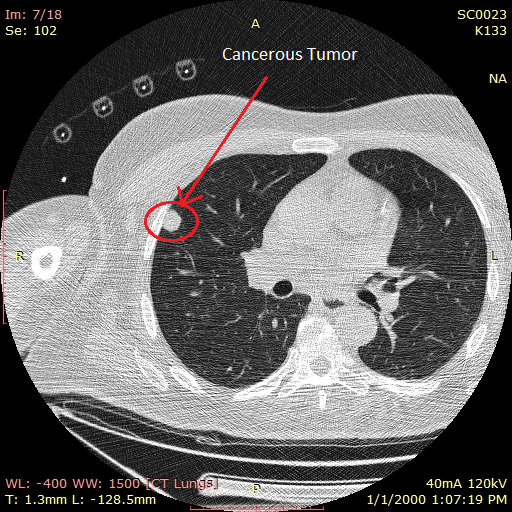

In [2]:
#Viewing the cancerous tumor in lungs.
from IPython.display import Image
Image(filename='C:/Users/Kishlaya/Desktop/can.png') 

### Image without tumor

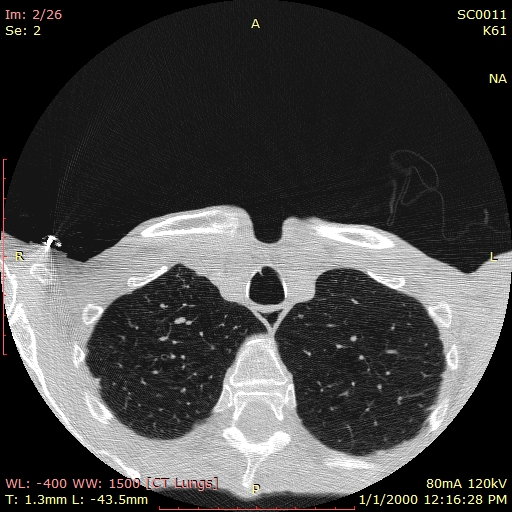

In [3]:
#Viewing the image without any tumor.
from IPython.display import Image
Image(filename='C:/Users/Kishlaya/Desktop/nocan.jpg') 

- We will 1st classify all the images we have into test and train and inside each of that we will have to set namely 'cancer' and 'non-cancer' according to the images shown above.
- After performing the above steps we will fit the images into model to get the accuracy

## Building the Model

In [4]:
## Initialising the CNN
classifier = Sequential()

In [5]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [6]:
## Flattening
classifier.add(Flatten())

In [7]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [8]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [9]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [11]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [12]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
## Importing training data
train_set = train_datagen.flow_from_directory('cancer\\Train',
                                               target_size=(150,150),
                                               
                                               class_mode='binary')

Found 1607 images belonging to 2 classes.


In [14]:
#Getting the classes names i.e. cancerous or non-cancerous
train_set.class_indices

{'cancer': 0, 'non_cancer': 1}

In [15]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'cancer': 0, 'non_cancer': 1}


In [16]:
## Importng test data
test_set = test_datagen.flow_from_directory('cancer\\Test',
                                            target_size=(150,150),
                                            
                                            class_mode='binary')

Found 200 images belonging to 2 classes.


In [26]:
## fitting model to images
classifier.fit_generator(
        train_set,
        epochs=5,
        validation_data=test_set
        )

Epoch 1/5
51/51 [==============================] - 47s 916ms/step - loss: 0.1297 - accuracy: 0.9527 - val_loss: 0.1288 - val_accuracy: 0.8250
Epoch 2/5
51/51 [==============================] - 43s 838ms/step - loss: 0.1254 - accuracy: 0.9515 - val_loss: 0.2502 - val_accuracy: 0.8200
Epoch 3/5
51/51 [==============================] - 46s 901ms/step - loss: 0.1307 - accuracy: 0.9409 - val_loss: 0.2109 - val_accuracy: 0.8450
Epoch 4/5
51/51 [==============================] - 44s 863ms/step - loss: 0.1138 - accuracy: 0.9564 - val_loss: 0.0490 - val_accuracy: 0.8600
Epoch 5/5
51/51 [==============================] - 44s 870ms/step - loss: 0.1092 - accuracy: 0.9552 - val_loss: 0.2424 - val_accuracy: 0.8300


- After running the model for about 20+20+5 epochs we got a accuracy of 95.5% with validation accuracy of 85%.

## Getting inference / validation

In [34]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image1= image.load_img('C:/Users/Kishlaya/Desktop/testcan.jpg'
                           ,target_size =(150,150))
test_image2= image.load_img('C:/Users/Kishlaya/Desktop/testnocan.jpg'
                           ,target_size =(150,150))
def inference(test_image):
    test_image = image.img_to_array(test_image)
    test_image=test_image.reshape(1,150,150,3)
    result = classifier.predict(test_image)
    if result == 1:
        prediction = 'Non-Cancer'
    else:
       prediction = 'Cancer'
    return(prediction)

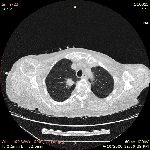

In [35]:
#Feeding a cacerous image
test_image1

In [36]:
print(inference(test_image1))

Cancer


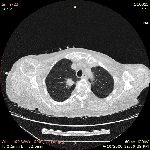

In [37]:
#Feeding a non-cancerous image
test_image1

In [38]:
print(inference(test_image2))

Non-Cancer


## As we can see we are able to predict new images as cancerous/non-cancerous.